### Dengue (2025)

A dengue faz parte de um grupo de doenças denominadas arboviroses, que se caracterizam por serem causadas por vírus transmitidos por vetores artrópodes. No Brasil, o vetor da dengue é a fêmea do mosquito Aedes aegypti (significa "odioso do Egito"). Os vírus dengue (DENV) estão classificados cientificamente na família Flaviviridae e no gênero Flavivirus. Até o momento são conhecidos quatro sorotipos – DENV-1, DENV-2, DENV-3 e DENV-4 –, que apresentam distintos materiais genéticos (genótipos) e linhagens.<br/>

As evidências apontam que o mosquito tenha vindo nos navios que partiam da África com escravos. No Brasil, a primeira epidemia documentada clínica e laboratorialmente ocorreu em 1981-1982, em Boa Vista (RR), causada pelos sorotipos 1 e 4. Após quatro anos, em 1986, ocorreram epidemias atingindo o estado do Rio de Janeiro e algumas capitais da região Nordeste. Desde então, a dengue vem ocorrendo de forma continuada (endêmica), intercalando-se com a ocorrência de epidemias, geralmente associadas à introdução de novos sorotipos em áreas indenes (sem transmissão) e/ou alteração do sorotipo predominante, acompanhando a expansão do mosquito vetor.<br/>

Aspectos como a urbanização, o crescimento desordenado da população, o saneamento básico deficitário e os fatores climáticos mantêm as condições favoráveis para a presença do vetor, com reflexos na dinâmica de transmissão desses arbovírus. A dengue possui padrão sazonal, com aumento do número de casos e o risco para epidemias, principalmente entre os meses de outubro de um ano a maio do ano seguinte.

### Sinais e sintomas
A dengue é uma doença febril aguda, sistêmica, dinâmica, debilitante e autolimitada. A maioria dos doentes se recupera, porém, parte deles podem progredir para formas graves, inclusive virem a óbito. A quase totalidade dos óbitos por dengue é evitável e depende, na maioria das vezes, da qualidade da assistência prestada e organização da rede de serviços de saúde.

Todo indivíduo que apresentar febre (39°C a 40°C) de início repentino e apresentar pelo menos duas das seguintes manifestações - dor de cabeça, prostração, dores musculares e/ou articulares e dor atrás dos olhos – deve procurar imediatamente um serviço de saúde, a fim de obter tratamento oportuno.

### Taxa de incidência de dengue <br/>
http://tabnet.datasus.gov.br/tabdata/LivroIDB/2edrev/d0203.pdf

In [ ]:
#Instalação das bibliotecas

#!pip install xlrd
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install plotly


In [72]:
#Bibliotecas

import pandas as pd
import numpy as np

#libs gráficas
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

#Avisos
import warnings
warnings.filterwarnings('ignore')

### Carregando os dados

In [2]:
df_dengue = pd.read_excel('Base de Dados Dengue.xlsx')
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3


### Explorando o dataset

Tamanhdo da Base de Dados

In [3]:
print(f'Tamanho do nosso Dataset: {df_dengue.shape}')

Tamanho do nosso Dataset: (728772, 4)


In [4]:
df_dengue.shape

(728772, 4)

Verificar os tipos dos dados

In [5]:
df_dengue.dtypes

municipio                 object
uf                        object
data_infeccoes    datetime64[ns]
qtd_infeccoes              int64
dtype: object

Existe valores nulos?

In [6]:
print(f'Quantidade de dados nulos: {df_dengue.isnull().sum().sum()}')

Quantidade de dados nulos: 0


In [7]:
df_dengue.isnull()

,municipio,uf,data_infeccoes,qtd_infeccoes
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
728767,False,False,False,False
728768,False,False,False,False
728769,False,False,False,False
728770,False,False,False,False


In [8]:
df_dengue.isnull().sum()

municipio         0
uf                0
data_infeccoes    0
qtd_infeccoes     0
dtype: int64

In [9]:
df_dengue.isnull().sum().sum()

0

Quais informações queremos trabalhar?

In [10]:
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3


Informações sobre a base

In [11]:
df_dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728772 entries, 0 to 728771
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   municipio       728772 non-null  object        
 1   uf              728772 non-null  object        
 2   data_infeccoes  728772 non-null  datetime64[ns]
 3   qtd_infeccoes   728772 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 22.2+ MB


Verificar os valores únicos?

In [12]:
df_dengue.nunique()

municipio         5243
uf                  27
data_infeccoes     132
qtd_infeccoes     1157
dtype: int64

Precisamos calcular a quantidade de pessoas que pegaram dengue por Município por ano.

In [13]:
# Criar uma coluna com o ano
df_dengue["ano"] = df_dengue["data_infeccoes"].dt.year

In [14]:
df_dengue

,municipio,uf,data_infeccoes,qtd_infeccoes,ano
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34,2013
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44,2013
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15,2013
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4,2013
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3,2013
...,...,...,...,...,...
728767,BRASILIA,DF,2023-08-01,939,2023
728768,BRASILIA,DF,2023-09-01,843,2023
728769,BRASILIA,DF,2023-10-01,686,2023
728770,BRASILIA,DF,2023-11-01,1300,2023


In [15]:
# Agrupar por município e ano
infeccoes_municipio = df_dengue.groupby(["ano", "municipio", "uf"])["qtd_infeccoes"].sum().reset_index()

In [16]:
infeccoes_municipio

,ano,municipio,uf,qtd_infeccoes
0,2013,ABADIA DE GOIAS,GO,52
1,2013,ABADIA DOS DOURADOS,MG,0
2,2013,ABADIANIA,GO,37
3,2013,ABAETE,MG,486
4,2013,ABAETETUBA,PA,15
...,...,...,...,...
60726,2023,XIQUE-XIQUE,BA,0
60727,2023,ZABELE,PB,7
60728,2023,ZACARIAS,SP,0
60729,2023,ZE DOCA,MA,0


Agora vamos olhar por Estado

In [17]:
# Agrupar por estado (UF) e ano
infeccoes_estado = df_dengue.groupby(["ano", "uf"])["qtd_infeccoes"].sum().reset_index()

In [18]:
display(infeccoes_estado)

,ano,uf,qtd_infeccoes
0,2013,AC,1663
1,2013,AL,704
2,2013,AM,4327
3,2013,AP,546
4,2013,BA,13417
...,...,...,...
292,2023,RS,27389
293,2023,SC,77954
294,2023,SE,1749
295,2023,SP,198774


Estatística Descritiva

In [19]:
infeccoes_estado.describe()

,ano,qtd_infeccoes
count,297.000000,297.000000
mean,2018.000000,12872.474747
std,3.167615,31630.107741
min,2013.000000,0.000000
25%,2015.000000,780.000000
50%,2018.000000,2229.000000
75%,2021.000000,10098.000000
max,2023.000000,286000.000000


Interpretação da estatística descritiva utilizando o gráfico de Boxplot Whiskers

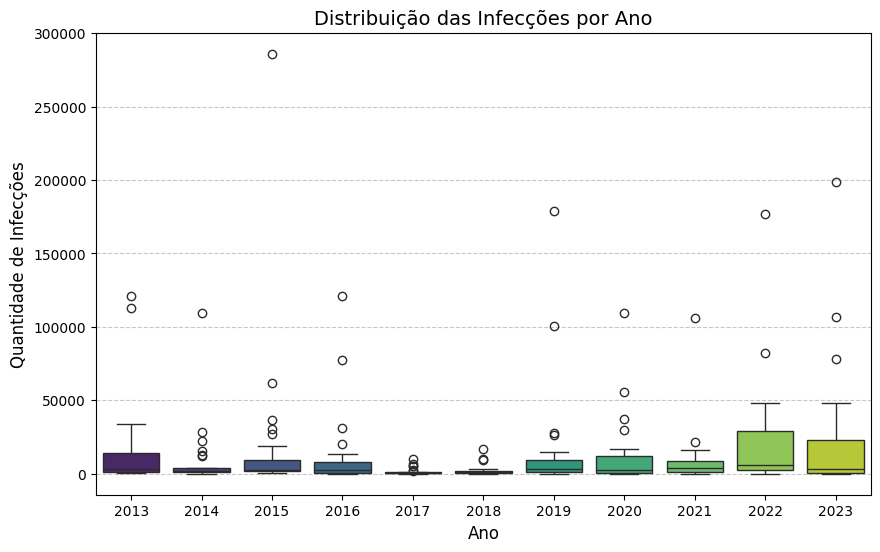

In [20]:
# Criar boxplot comparando a quantidade de infecções por ano
plt.figure(figsize=(10, 6))
sns.boxplot(data=infeccoes_estado, x="ano", y="qtd_infeccoes", palette="viridis")

# Personalizar o gráfico
plt.title("Distribuição das Infecções por Ano", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Quantidade de Infecções", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()


#### Interpretação
O gráfico boxplot apresenta a distribuição das infecções por ano, evidenciando uma grande variabilidade na quantidade de casos confirmados. A presença de outliers demonstra períodos em que houve surtos de grande escala, o que reforça a necessidade de um monitoramento contínuo. Os picos de infecções coincidem com eventos climáticos favoráveis à proliferação do mosquito, como temporadas de chuvas intensas.

Vamos olhar para o Ano de 2023

In [21]:
# Filtrar os dados para o ano de 2023
infeccoes_estado_2023 = infeccoes_estado[(infeccoes_estado["ano"] == 2023)]


In [22]:
infeccoes_estado_2023

,ano,uf,qtd_infeccoes
270,2023,AC,1781
271,2023,AL,473
272,2023,AM,3263
273,2023,AP,742
274,2023,BA,13249
275,2023,CE,7437
276,2023,DF,23710
277,2023,ES,0
278,2023,GO,21682
279,2023,MA,2428


In [23]:
infeccoes_estado_2023.describe()

,ano,qtd_infeccoes
count,27.0,27.000000
mean,2023.0,22902.888889
std,0.0,43368.215001
min,2023.0,0.000000
25%,2023.0,744.000000
50%,2023.0,3263.000000
75%,2023.0,22696.000000
max,2023.0,198774.000000


Visualizar os dados via boxplot

Matplotlib

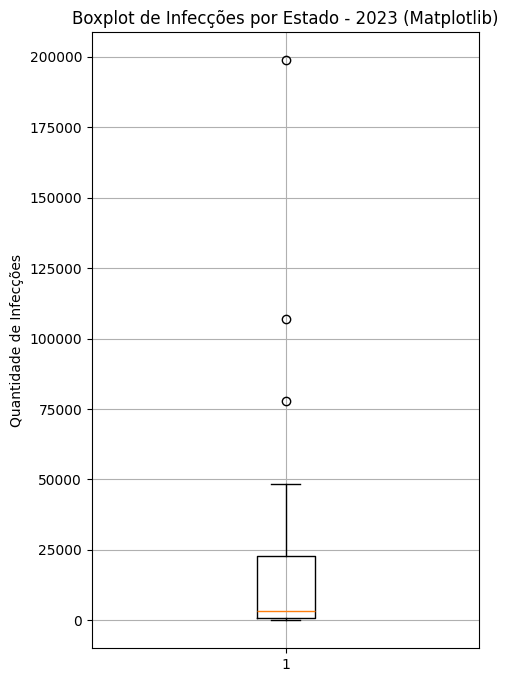

In [24]:
# Criar boxplot com Matplotlib
plt.figure(figsize=(5, 8))
plt.boxplot(infeccoes_estado_2023["qtd_infeccoes"], vert=True)
plt.title("Boxplot de Infecções por Estado - 2023 (Matplotlib)")
plt.ylabel("Quantidade de Infecções")
plt.grid(True)
plt.show()


Seaborn

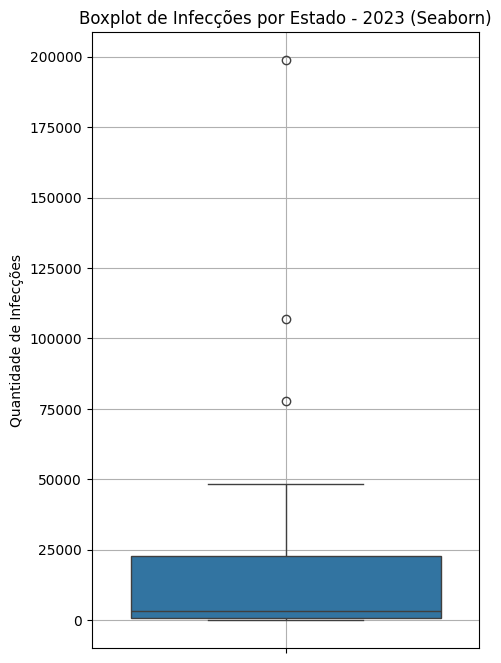

In [25]:
plt.figure(figsize=(5, 8))
sns.boxplot(y=infeccoes_estado_2023["qtd_infeccoes"])
plt.title("Boxplot de Infecções por Estado - 2023 (Seaborn)")
plt.ylabel("Quantidade de Infecções")
plt.grid(True)
plt.show()

Plotly

In [26]:
# Criar boxplot com Plotly na vertical
fig = px.box(infeccoes_estado_2023, y="qtd_infeccoes", title="Boxplot de Infecções por Estado - 2023 (Plotly)")
fig.show()

Comparação entre os estados

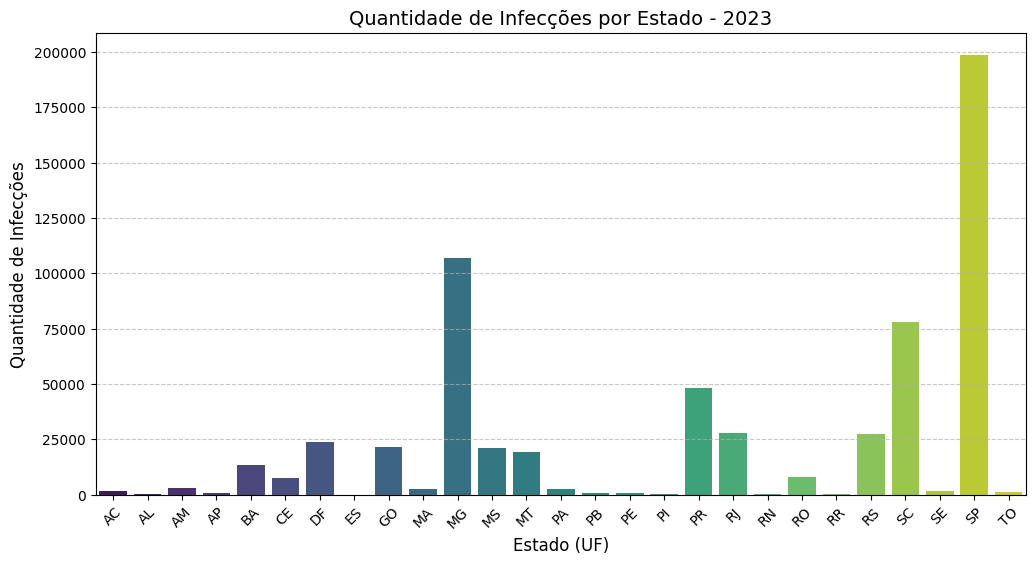

In [27]:
# Criar gráfico de barras comparando a quantidade de infecções por estado em 2023 usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=infeccoes_estado_2023, x="uf", y="qtd_infeccoes", palette="viridis")

# Personalizar o gráfico
plt.title("Quantidade de Infecções por Estado - 2023", fontsize=14)
plt.xlabel("Estado (UF)", fontsize=12)
plt.ylabel("Quantidade de Infecções", fontsize=12)
plt.xticks(rotation=45)  # Rotacionar rótulos para melhor legibilidade
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()

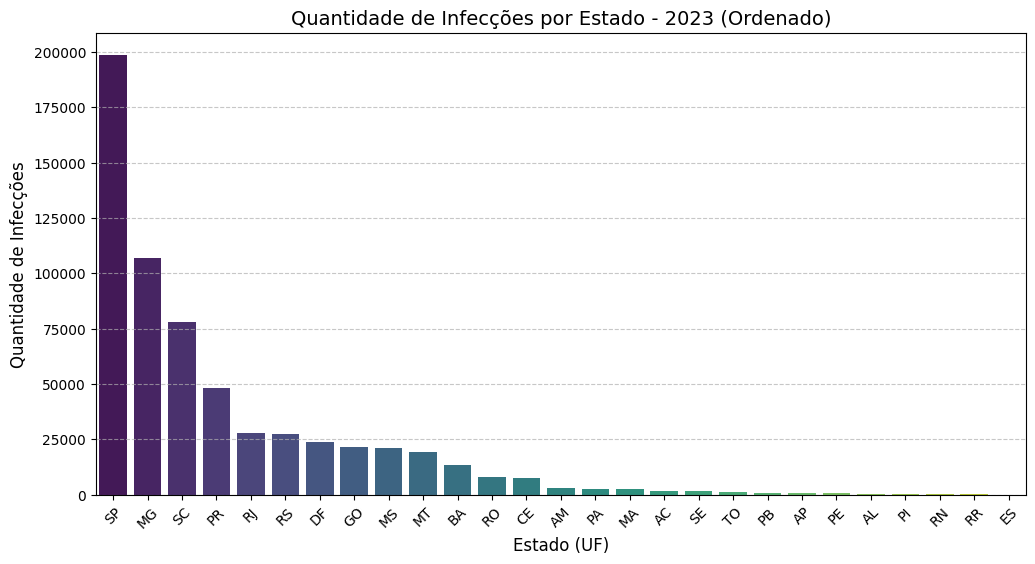

In [28]:
# Ordenar os dados do maior para o menor número de infecções
infeccoes_2023 = infeccoes_estado_2023.sort_values(by="qtd_infeccoes", ascending=False)

# Criar gráfico de barras ordenado
plt.figure(figsize=(12, 6))
sns.barplot(data=infeccoes_2023, x="uf", y="qtd_infeccoes", palette="viridis")

# Personalizar o gráfico
plt.title("Quantidade de Infecções por Estado - 2023 (Ordenado)", fontsize=14)
plt.xlabel("Estado (UF)", fontsize=12)
plt.ylabel("Quantidade de Infecções", fontsize=12)
plt.xticks(rotation=45)  # Rotacionar rótulos para melhor legibilidade
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()


#### Interpretação
Este gráfico mostra a quantidade de infecções confirmadas em cada estado brasileiro no ano de 2023. São Paulo, Minas Gerais e Santa Catarina lideram em número absoluto de casos, o que pode estar relacionado à alta densidade populacional e condições climáticas favoráveis ao mosquito transmissor.

Gráfico de Tendência

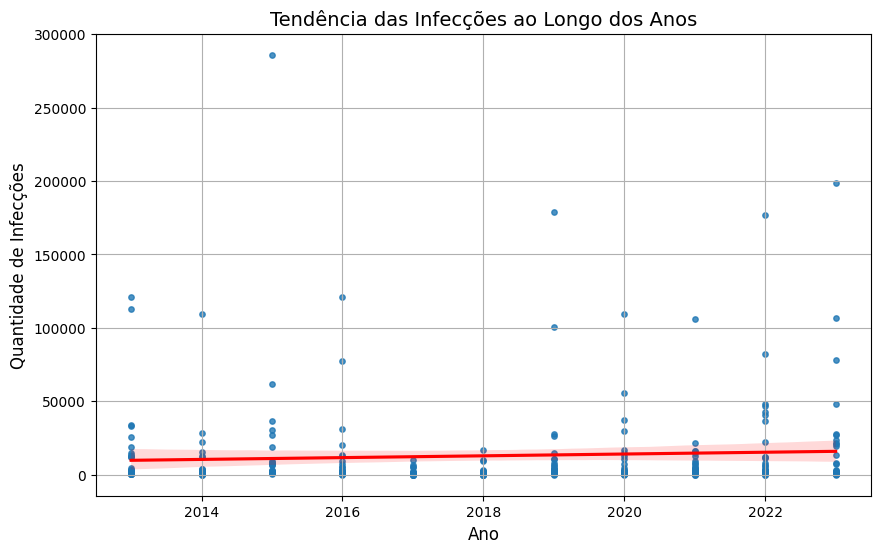

In [29]:
# Criar gráfico de regressão linear simples usando Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(data=infeccoes_estado, x="ano", y="qtd_infeccoes", scatter_kws={"s": 15}, line_kws={"color": "red"})

# Personalizar o gráfico
plt.title("Tendência das Infecções ao Longo dos Anos", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Quantidade de Infecções", fontsize=12)
plt.grid(True)

# Exibir o gráfico
plt.show()


#### Interpretação
A análise de tendência revela um aumento gradual no número de infecções ao longo dos anos. A linha de tendência (em vermelho) indica que, mesmo com oscilações anuais, há um padrão de crescimento sustentado, reforçando a necessidade de políticas públicas eficazes de controle e prevenção.

Calcular a taxa de infecção por 100 mil habitantes

In [30]:
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes,ano
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34,2013
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44,2013
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15,2013
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4,2013
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3,2013


In [31]:
infeccoes_estado

,ano,uf,qtd_infeccoes
0,2013,AC,1663
1,2013,AL,704
2,2013,AM,4327
3,2013,AP,546
4,2013,BA,13417
...,...,...,...
292,2023,RS,27389
293,2023,SC,77954
294,2023,SE,1749
295,2023,SP,198774


In [53]:
df_populacao_2013_2023 = pd.read_excel('Populacao_2013_2023.xlsx')
df_populacao_2013_2023.head()

,Município,uf,População 2013,População 2014,População 2015,População 2016,População 2017,População 2018,População 2019,População 2020,População 2021,População 2022,População 2023
0,ALTA FLORESTA D'OESTE,RO,25728,25652,25578,25506,25437,23167,22945,22728,22516,21494,21494
1,ARIQUEMES,RO,101269,102860,104401,105896,107345,106168,107863,109523,111148,96833,96833
2,CABIXI,RO,6495,6424,6355,6289,6224,5438,5312,5188,5067,5351,5351
3,CACOAL,RO,85863,86556,87226,87877,88507,84813,85359,85893,86416,86887,86887
4,CEREJEIRAS,RO,18041,18013,17986,17959,17934,16444,16323,16204,16088,15890,15890


In [54]:
df_populacao_2013_2023.rename(columns={"Município": "municipio"}, inplace=True)

In [55]:
# Filtrar os dados para o ano de 2023
populacao_estado_2023 = df_populacao_2013_2023[['uf','População 2023']]

In [61]:
populacao_estado_2023 = populacao_estado_2023.groupby(["uf"])["População 2023"].sum().reset_index()

In [62]:
populacao_estado_2023

,uf,População 2023
0,AC,830018
1,AL,4380528
2,AM,3941613
3,AP,733759
4,BA,14195684
5,CE,8809122
6,DF,2817381
7,ES,3827322
8,GO,7049069
9,MA,6777432


In [57]:
infeccoes_2023

,ano,uf,qtd_infeccoes
295,2023,SP,198774
280,2023,MG,106923
293,2023,SC,77954
287,2023,PR,48328
288,2023,RJ,27905
292,2023,RS,27389
276,2023,DF,23710
278,2023,GO,21682
281,2023,MS,21098
282,2023,MT,19356


In [63]:
df_dengue_pop = pd.merge(infeccoes_2023, populacao_estado_2023,  how = 'left', on = 'uf')

In [65]:
df_dengue_pop

,ano,uf,qtd_infeccoes,População 2023
0,2023,SP,198774,42821386
1,2023,MG,106923,20313206
2,2023,SC,77954,8501240
3,2023,PR,48328,11814287
4,2023,RJ,27905,15882034
5,2023,RS,27389,10356242
6,2023,DF,23710,2817381
7,2023,GO,21682,7049069
8,2023,MS,21098,1917925
9,2023,MT,19356,3687268


Calcular a Taxa de Infecção por Dengue

In [66]:
# Calcular a taxa de infecções por 100 mil habitantes
df_dengue_pop["infecoes_por_100mil"] = round((df_dengue_pop["qtd_infeccoes"] / df_dengue_pop["População 2023"]) * 100000)

In [67]:
df_dengue_pop

,ano,uf,qtd_infeccoes,População 2023,infecoes_por_100mil
0,2023,SP,198774,42821386,464.0
1,2023,MG,106923,20313206,526.0
2,2023,SC,77954,8501240,917.0
3,2023,PR,48328,11814287,409.0
4,2023,RJ,27905,15882034,176.0
5,2023,RS,27389,10356242,264.0
6,2023,DF,23710,2817381,842.0
7,2023,GO,21682,7049069,308.0
8,2023,MS,21098,1917925,1100.0
9,2023,MT,19356,3687268,525.0


Gráfico com a Tx de infecções

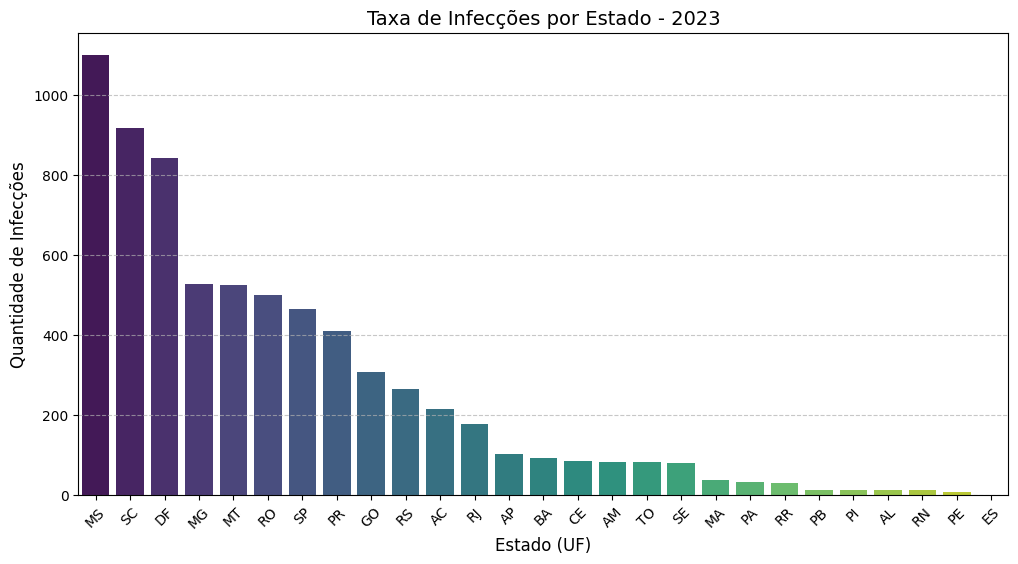

In [70]:
# Ordenar os dados do maior para o menor número de infecções
tx_infeccoes_2023 = df_dengue_pop.sort_values(by="infecoes_por_100mil", ascending=False)

# Criar gráfico de barras ordenado
plt.figure(figsize=(12, 6))
sns.barplot(data=tx_infeccoes_2023, x="uf", y="infecoes_por_100mil", palette="viridis")

# Personalizar o gráfico
plt.title("Taxa de Infecções por Estado - 2023", fontsize=14)
plt.xlabel("Estado (UF)", fontsize=12)
plt.ylabel("Quantidade de Infecções", fontsize=12)
plt.xticks(rotation=45)  # Rotacionar rótulos para melhor legibilidade
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()


#### Interpretação
Este gráfico destaca a taxa de infecções por estado em 2023, permitindo uma comparação proporcional entre as regiões. A análise revela que alguns estados apresentam taxas de infecção significativamente mais altas, independentemente do número absoluto de casos.

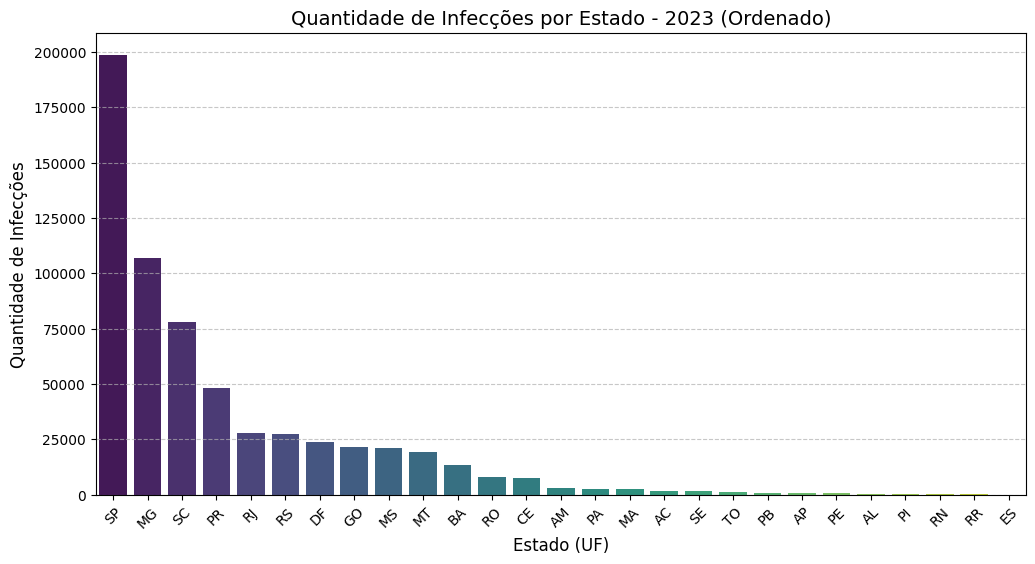

In [71]:
# Ordenar os dados do maior para o menor número de infecções
infeccoes_2023 = infeccoes_estado_2023.sort_values(by="qtd_infeccoes", ascending=False)

# Criar gráfico de barras ordenado
plt.figure(figsize=(12, 6))
sns.barplot(data=infeccoes_2023, x="uf", y="qtd_infeccoes", palette="viridis")

# Personalizar o gráfico
plt.title("Quantidade de Infecções por Estado - 2023 (Ordenado)", fontsize=14)
plt.xlabel("Estado (UF)", fontsize=12)
plt.ylabel("Quantidade de Infecções", fontsize=12)
plt.xticks(rotation=45)  # Rotacionar rótulos para melhor legibilidade
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()